In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly import tools
import scipy.stats as sp
from scipy.optimize import fmin
from scipy.optimize import minimize
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
apiKey = 'lQg24SpLGpWSL3Yn35VS'
plotly.tools.set_credentials_file(username='amcdonne', api_key=apiKey)
plotly.tools.set_config_file(world_readable=False, sharing='private')

# (i) Firm Value

### (a) Simulate the value of the firm 250,000 times over a 20 year period using the Merton Model

In [2]:
def merton_model(V, K, sigma, T, dt, iRate, num_paths):
    num_periods = int(T*dt**-1)
    #Creates a matrix filled with zeros; Rows: num_paths, Columns: num_periods
    asset_value = np.zeros((num_periods + 1, int(num_paths)))
    asset_value[0] = V
    for t in range(1, num_periods+1):
        if t > 120:
            sigma = .25
        # The stochastic equation for simulating the firm value
        asset_value[t] = asset_value[t-1]*np.exp((iRate -.5*sigma**2)*dt + sigma*np.random.randn(num_paths)*np.sqrt(dt))
    return asset_value

In [3]:
simulated_asset_values = merton_model(V=100, K=80, sigma=.15, T=20, dt=1/12, iRate=0.031, num_paths=250000)

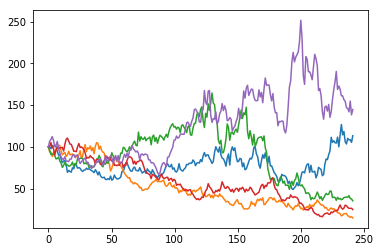

In [4]:
# Faster more effiecient plotting for randomly selected paths; not as clean of a plot as the other though
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 241, num=241)
ax.plot(x, simulated_asset_values[:,np.random.randint(250000)],
         x, simulated_asset_values[:,np.random.randint(250000)],
         x, simulated_asset_values[:,np.random.randint(250000)],
         x, simulated_asset_values[:,np.random.randint(250000)],
         x, simulated_asset_values[:,np.random.randint(250000)])

In [37]:
#np.random.randint(250000)

trace0 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 1'
)
trace1 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 2'
)
trace2 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 3'
)
trace3 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 4'
)
trace4 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 5'
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = dict(title = 'Asset Value Simulation',
              xaxis = dict(title = 'Time Period in months'),
              yaxis = dict(title = 'Asset Value'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Credit-Risk-Merton_Monte_Carlo')

C:\Users\austi\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### (b) Plot Residual Firm Values

In [5]:
residual_firm_value = simulated_asset_values - 80

In [6]:
# Was originally trying to separate all of the defaluted and non defaulted paths from any point in time
#np array (rows, columns); we want to get rid of all the columns where any row is less than 80
#not_defaulted = simulated_asset_values > 80
#np.sum(not_defaulted, axis=1)
#not_defaulted[:,5]
data = [go.Histogram(x=residual_firm_value[-1,:])]
layout = dict(title = 'Asset Values at T Histogram',
              xaxis = dict(title = 'Number of observations'),
              yaxis = dict(title = 'Asset Value'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Credit-Risk-Merton_Distribution')

C:\Users\austi\Anaconda\lib\site-packages\plotly-3.3.0-py3.7.egg\plotly\plotly\plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

C:\Users\austi\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



C:\Users\austi\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



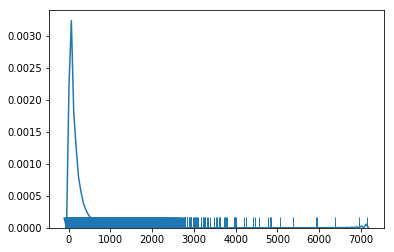

In [41]:
sns.distplot(residual_firm_value[-1,:], hist=False, rug=True);

### (c) Default Probability @ T

In [36]:
def default_probability(V_0, K, sigma, T, iRate):
    d1 = (np.log(V_0/K) + (iRate + .5*sigma**2)*T)/ (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    print(sp.norm.pdf(d1))
    print(sp.norm.pdf(d2))
    print(sp.norm.pdf(-d2))
    equity_0 = V_0*sp.norm.cdf(d1) - K*np.exp(-iRate*T)*sp.norm.cdf(d2)
    return ('Call Option Price: ' + str(round(equity_0, 2)),'Probabilty of Default @ T: ' + str(round(sp.norm.cdf(-d2)*100, 2)) + '%')

In [37]:
default_probability(V_0=100, K=80, sigma=.25, T=20, iRate=0.031)

0.16844992942261527
0.3914203718134209
0.3914203718134209


('Call Option Price: 65.7', 'Probabilty of Default @ T: 42.27%')

0.321112544987395

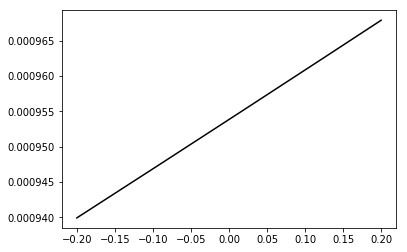

In [7]:
kde = sp.gaussian_kde(np.array(simulated_asset_values[-1,:]))

#visualize KDE
fig = plt.figure()
ax = fig.add_subplot(111)
x_eval = np.linspace(-.2, .2, num=200)
ax.plot(x_eval, kde(x_eval), 'k-')

#get probability from the integral of the assumed probability distribution from the ending asset values; from negative infinity to 80
kde.integrate_box_1d(-np.inf, 80)

### (d) Black Cox Model: Stopping time of default

In [8]:
def black_cox_model(V, K, sigma, T, dt, iRate, num_paths):
    num_periods = int(T*dt**-1)
    #Creates a matrix filled with zeros; Rows: num_paths, Columns: num_periods
    asset_value = np.zeros((num_periods + 1, int(num_paths)))
    non_default_binary = np.zeros((num_periods + 1, int(num_paths)))
    asset_value[0] = V
    non_default_binary[0] = V >= K*np.exp(-iRate*T)
    for t in range(1, num_periods+1):
        if t > 120:
            sigma = .25
        # The stochastic equation for simulating the firm value
        asset_value[t] = asset_value[t-1]*np.exp((iRate -.5*sigma**2)*dt + sigma*np.random.randn(num_paths)*np.sqrt(dt))
        #checks to see if the current asset values are greater than the discounted Face value of debt
        non_default_binary[t] = asset_value[t] >= K*np.exp(-iRate*(T-(t/240)))
        #temp_non_default_binary =  asset_value[t] >= K*np.exp(-iRate*(T-(t/240)))
        #previous_default_binary = non_default_binary[t] > non_default_binary[t-1]
        #non_default_binary[t] = np.logical_and(temp_non_default_binary, non_default_binary[t-1])
    # sums up all of the instances where there was not a default; ie. each row is equal to 241 if there was not a default
    binary_default_array = np.sum(non_default_binary, axis=0) == 241
    final_values = asset_value[-1,:] * binary_default_array
    #percent_defaulted = np.sum(np.sum(non_default_binary, axis=0) < 241)/num_paths
    return sp.gaussian_kde(final_values).integrate_box_1d(-np.inf, K)

In [9]:
black_cox_asset_values = black_cox_model(V=100, K=80, sigma=.15, T=20, dt=1/12, iRate=0.031, num_paths=250000)

In [11]:
print('Probability of defualt Model 2: ', black_cox_asset_values)

Probability of defualt Model 2:  0.3612610869739452


In [134]:
'''
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 241, num=241)
ax.plot(x, black_cox_asset_values[:,np.random.randint(250000)],
         x, black_cox_asset_values[:,np.random.randint(250000)],
         x, black_cox_asset_values[:,np.random.randint(250000)],
         x, black_cox_asset_values[:,np.random.randint(250000)],
         x, black_cox_asset_values[:,np.random.randint(250000)])
'''

'\nfig = plt.figure()\nax = plt.axes()\nx = np.linspace(0, 241, num=241)\nax.plot(x, black_cox_asset_values[:,np.random.randint(250000)],\n         x, black_cox_asset_values[:,np.random.randint(250000)],\n         x, black_cox_asset_values[:,np.random.randint(250000)],\n         x, black_cox_asset_values[:,np.random.randint(250000)],\n         x, black_cox_asset_values[:,np.random.randint(250000)])\n'

### (f) Changing the debt structure to equal out the probabilities

In [12]:
def merton_model_prob_default(V, K, sigma, T, dt, iRate, num_paths):
    num_periods = int(T*dt**-1)
    #Creates a matrix filled with zeros; Rows: num_paths, Columns: num_periods
    asset_value = np.zeros((num_periods + 1, int(num_paths)))
    asset_value[0] = V
    for t in range(1, num_periods+1):
        if t > 120:
            sigma = .25
        # The stochastic equation for simulating the firm value
        asset_value[t] = asset_value[t-1]*np.exp((iRate -.5*sigma**2)*dt + sigma*np.random.randn(num_paths)*np.sqrt(dt))
    # creates a PDF from the data and then integrates over that PDF from negative infinity to K to find the probability of falling in this region
    kde = sp.gaussian_kde(np.array(asset_value[-1,:]))
    return kde.integrate_box_1d(-np.inf, K)

def search_probability_merton(K):
    kde = sp.gaussian_kde(np.array(simulated_asset_values[-1,:]))
    return sp.gaussian_kde(np.array(simulated_asset_values[-1,:])).integrate_box_1d(-np.inf, K)

def prob_errors(debt_level):
    black_cox= black_cox_asset_values#black_cox_model(V=100, K=debt_level, sigma=.15, T=20, dt=1/12, iRate=0.031, num_paths=250000)
    merton= search_probability_merton(debt_level)#merton_model_prob_default(V=100, K=debt_level, sigma=.15, T=20, dt=1/12, iRate=0.031, num_paths=250000)
    return (black_cox - merton)**2

parameters = 80

In [13]:
res = minimize(fun=prob_errors, x0=parameters)

In [15]:
#debt level of 66.72 with teh current simulated values
print('Debt Level where probability of defaults in Model 1 and 2 equal: ', res.x)
optimized_debt_level = res.x[0]

Debt Level where probability of defaults in Model 1 and 2 equal:  [88.42765121]


In [16]:
print('Proabilty of Model 1 under the optimized debt level: ', search_probability_merton(optimized_debt_level))

Proabilty of Model 1 under the optimized debt level:  0.360920741749101
